# CAICT 風機結冰預測 - Data Exploration

2017/07/20
http://www.industrial-bigdata.com/competition/competitionAction!showDetail.action?competition.competitionId=1

In [1]:
from IPython.display import HTML
HTML('''<script>
presentation = 0;
code_show=true; 
function code_toggle() {
 if (!presentation){
     return;
 }
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


<a id='home'></a>
### Outline
[1. Modules](#load)  
[2. Input Data](#input)  
[3. Single Variable Exploration](#single)    
[4. Multi-Variable Exploration](#multi)
[5. dimension reduction](#dimen)

<a id='load'></a>
**1. Modules**

- **Python modules:**

In [2]:
%matplotlib inline
import sys
import os
import datetime
import pandas as pd
from PIL import Image
import numpy as np
import lzma
import pickle
from IPython.display import display
import shutil
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import *
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import scipy.stats as stats
import pylab
from scipy.stats import spearmanr
from scipy.stats import pearsonr

pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "none"

In [8]:
def checkPath(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc: 
            if exc.errno != errno.EEXIST:
                raise

- ** data loading and processing modules**

In [3]:

def StandardScaler(data):
    standard_scaler = preprocessing.StandardScaler()
    data_scaled = standard_scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
    return data_scaled

def MinMaxScaler(data):
    standard_scaler = preprocessing.MinMaxScaler()
    data_scaled = standard_scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
    return data_scaled

def load_resample_data(id, policy=1):
    filename = 'data/resample_data_p{POLICY}_{ID}.csv'.format(ID=id,POLICY=policy)
    data_resample = pd.read_csv(filename)
    data_resample['label']=data_resample['label'].fillna(2)
    data_X = data_resample.drop(['label','time','group','timestamp','event'], axis=1)
    data_y = data_resample['label']
    data_Y = np.eye(data_y.unique().size)[data_y.values.astype(int)]
    return data_resample, data_X, data_Y, data_y


- ** Mmltiple var chart modules**

<a id='input'></a>
** 2. Input Data **
- 15號風機
- remove 無效數據
- 沒有做resampling

In [7]:
#resampled data 
non_data_cols = ['label','time','group','timestamp','event']
data_raw, data_X, _, _ = load_resample_data(id=15,policy=0)
data_scaled = MinMaxScaler(data_X)
for col in non_data_cols:
    data_scaled[col] = data_raw[col]

data_pass = data_scaled[data_scaled['label']==0]
data_fail = data_scaled[data_scaled['label']==1]
cols=data_pass.columns
cols = cols.drop(['time','timestamp','group','event'])
#pd.DataFrame(cols).transpose()
events = data_pass['event'].unique()

In [19]:
print(cols)

Index(['wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'yaw_speed', 'pitch1_angle',
       'pitch2_angle', 'pitch3_angle', 'pitch1_speed', 'pitch2_speed',
       'pitch3_speed', 'pitch1_moto_tmp', 'pitch2_moto_tmp', 'pitch3_moto_tmp',
       'acc_x', 'acc_y', 'environment_tmp', 'int_tmp', 'pitch1_ng5_tmp',
       'pitch2_ng5_tmp', 'pitch3_ng5_tmp', 'pitch1_ng5_DC', 'pitch2_ng5_DC',
       'pitch3_ng5_DC', 'label'],
      dtype='object')


- ** correlation heatmap **

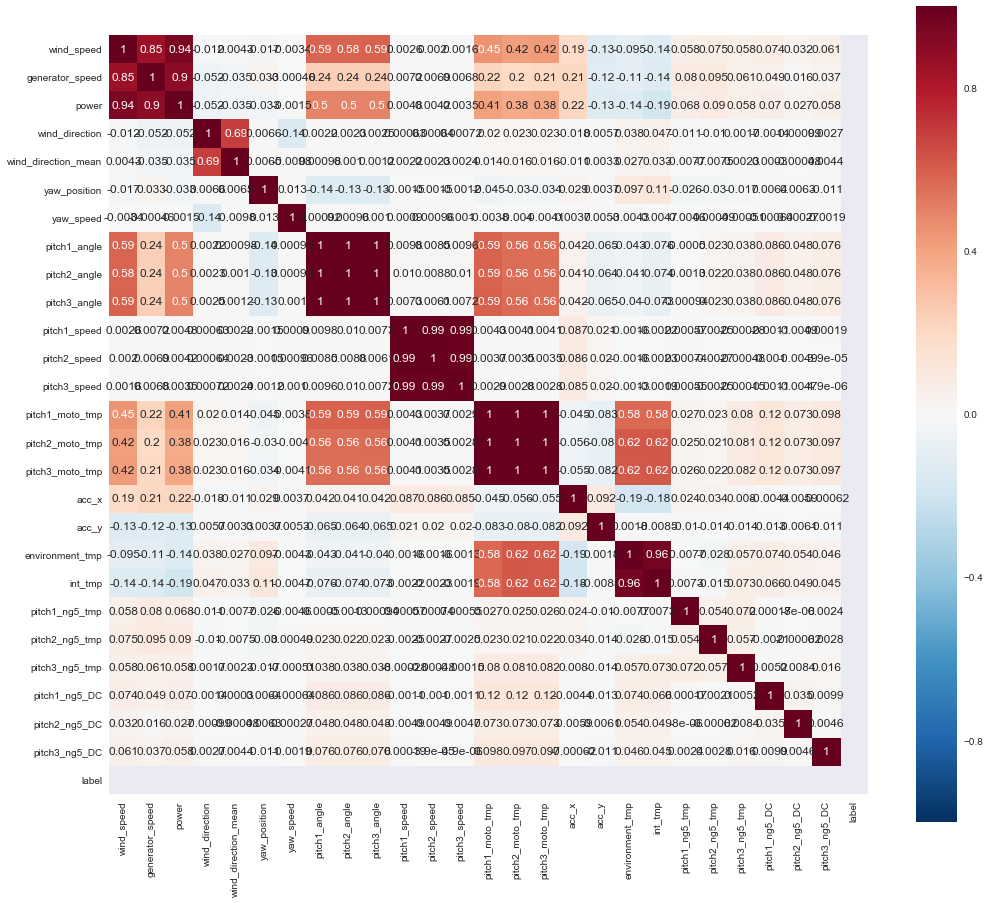

In [15]:
path_heatmap1='case_management/img/feature_importance/heatmap1/'
checkPath(path_heatmap1)

data_heatmap = data_pass[cols]
plt.figure(figsize=(17,15))
foo = sns.heatmap(data_heatmap.corr(), vmax=1, square=True, annot=True)
plt.tight_layout
imagename='{p}{n}.jpg'.format(p=path_heatmap1, n='all')
plt.savefig(imagename,bbox_inches='tight', dpi=200)

- ** Scatter Plot **
    - y: Power
    - x: all other variable

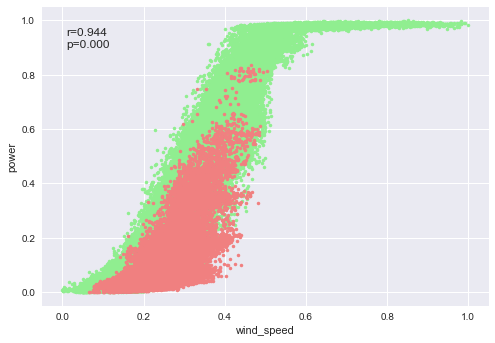

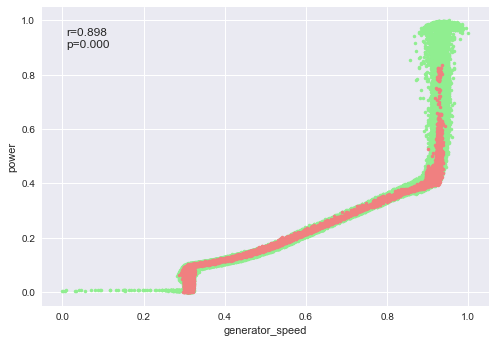

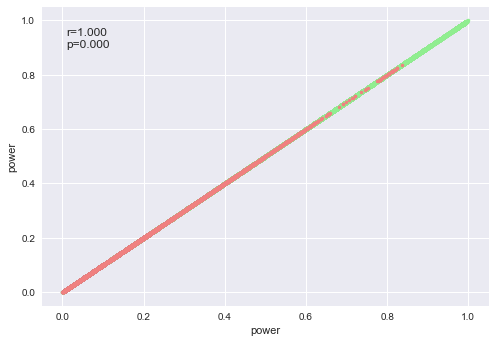

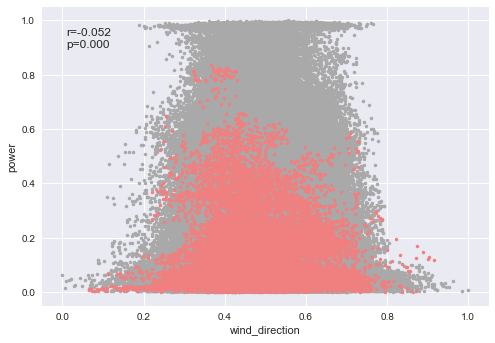

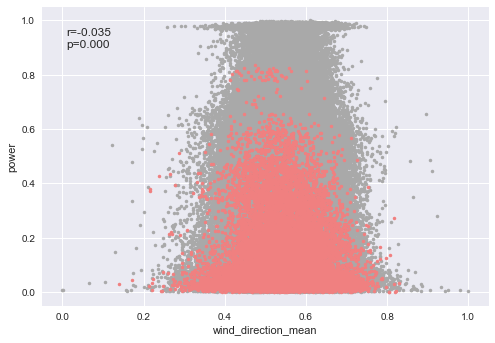

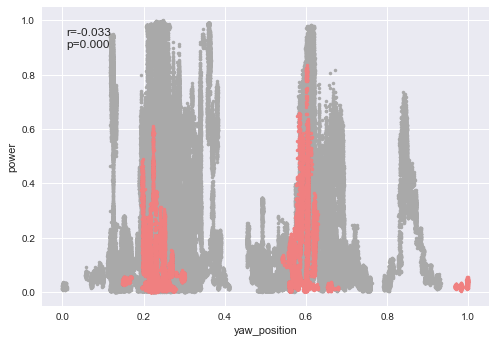

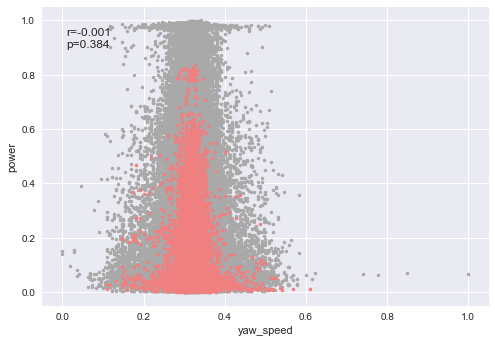

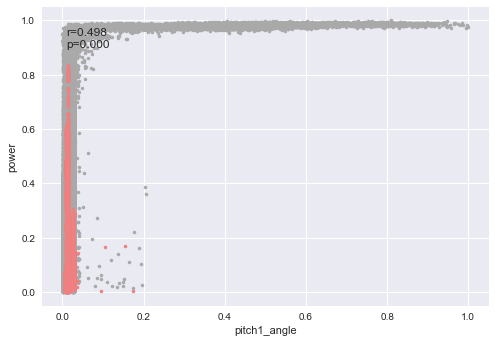

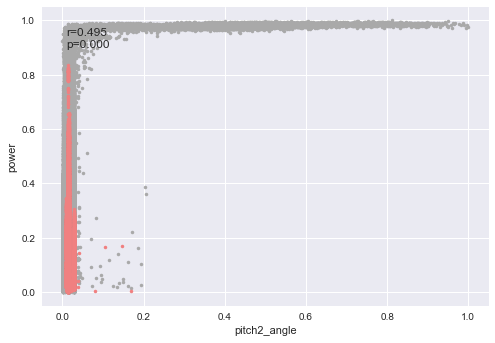

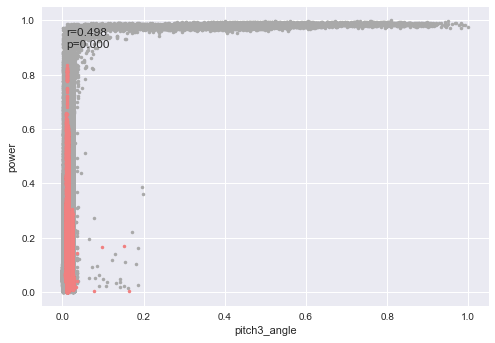

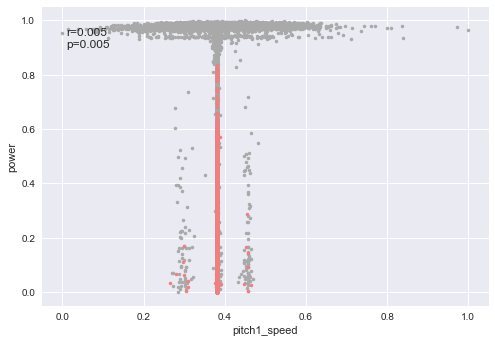

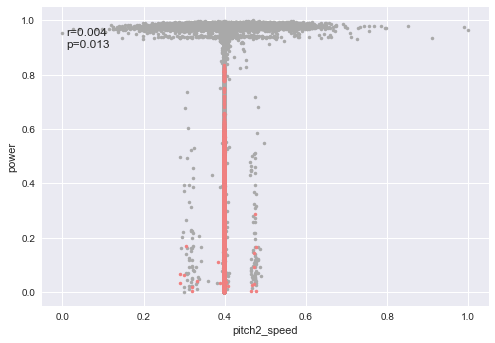

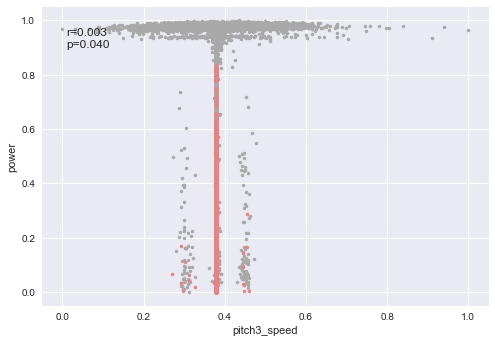

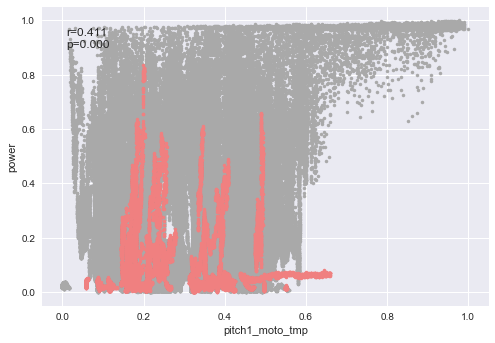

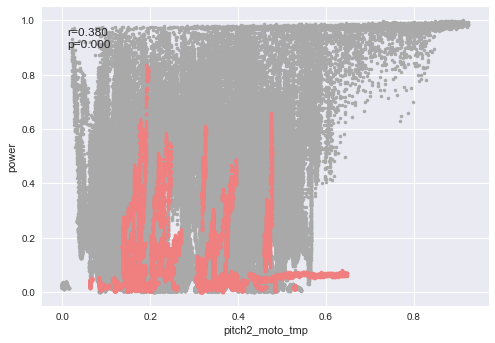

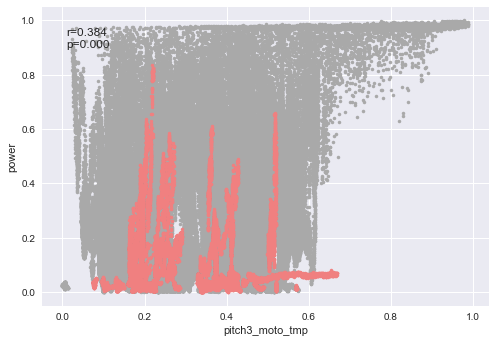

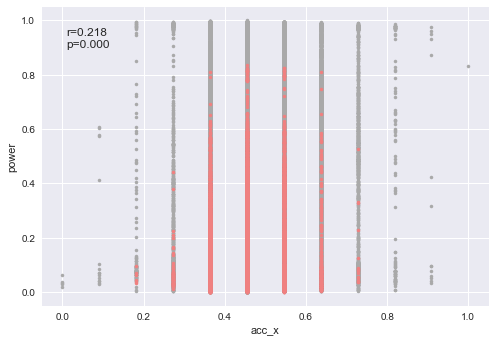

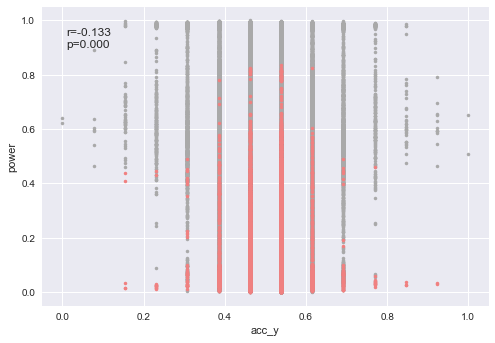

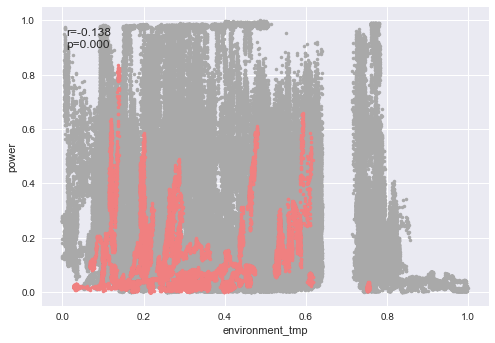

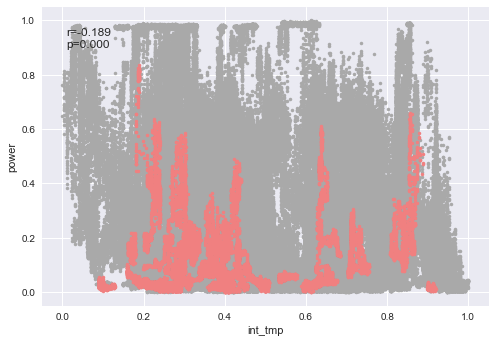

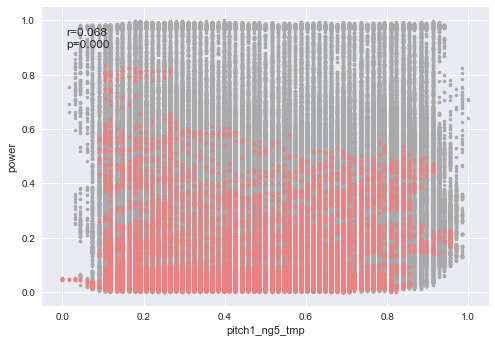

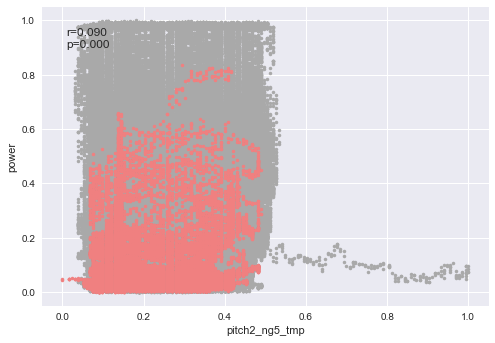

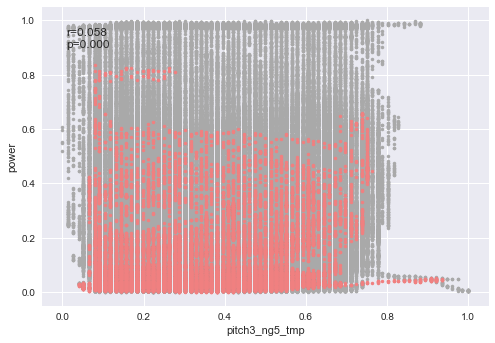

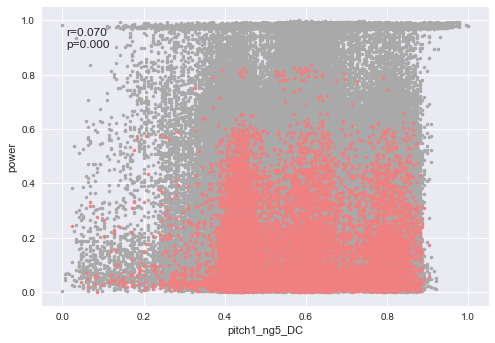

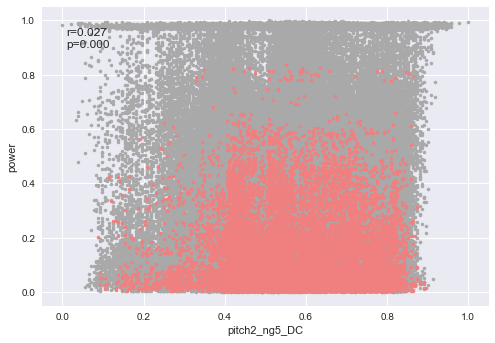

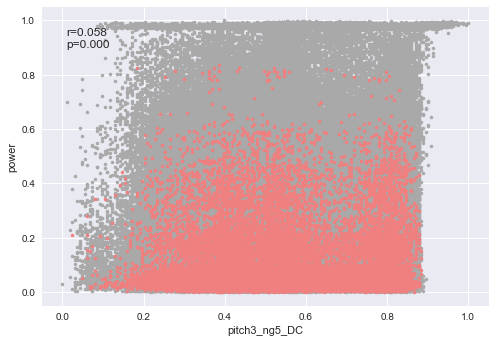

/Users/jayhsu/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


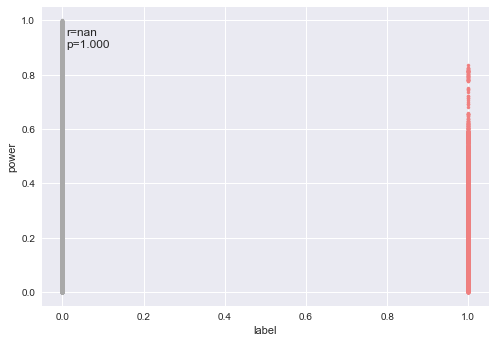

In [16]:
path='case_management/img/feature_importance/scatter_power/'
checkPath(path)

y='power'
for x in cols:
    #dummy = plt.figure(figsize=[8,8])
    r, p = pearsonr(data_pass[x],data_pass[y])
    raw_clr = 'lightgreen' if r>0.5 else 'darkgray'
    plt.plot(data_pass[x],data_pass[y],'.', color=raw_clr)
    plt.plot(data_fail[x],data_fail[y],'.', color='lightcoral')
    msg = 'r={corr:.3f}\np={pval:.3f}'.format(corr=r, pval=p)
    plt.text(0.01,0.9,msg)
    plt.xlabel(x)
    plt.ylabel(y)
    imagename='{p}{n}.jpg'.format(p=path, n=x)
    plt.savefig(imagename,bbox_inches='tight', dpi=200)
    plt.show()



- ** Scatter Plot **
    - y: wind_speed
    - x: all other variable

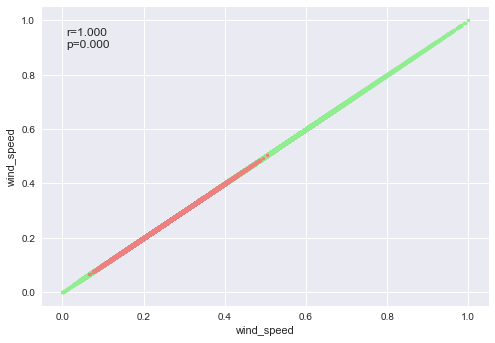

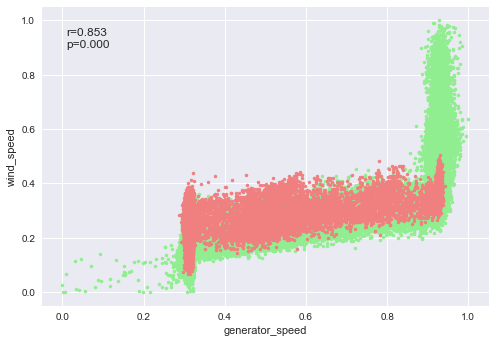

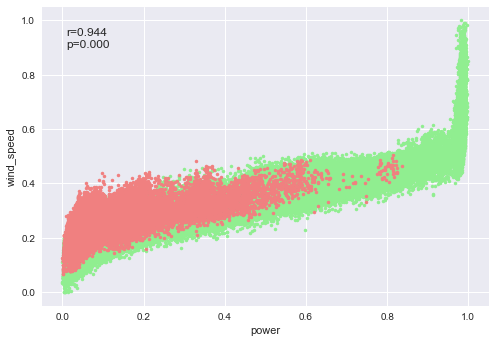

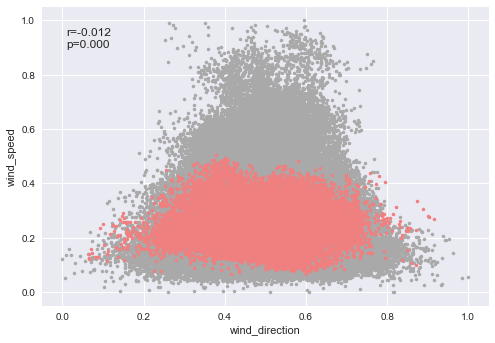

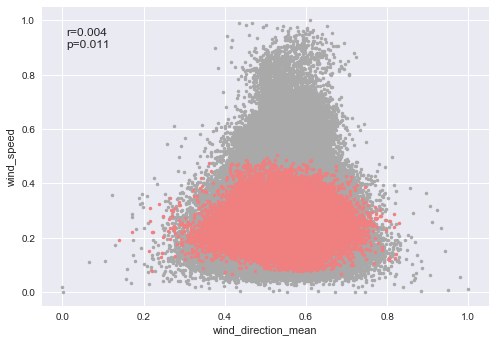

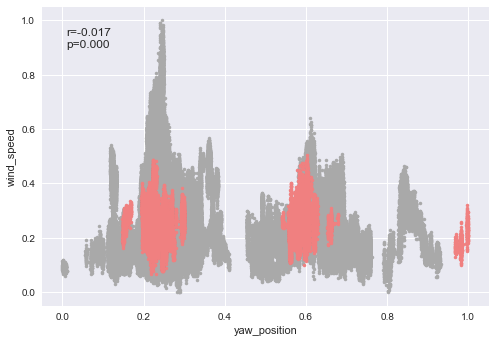

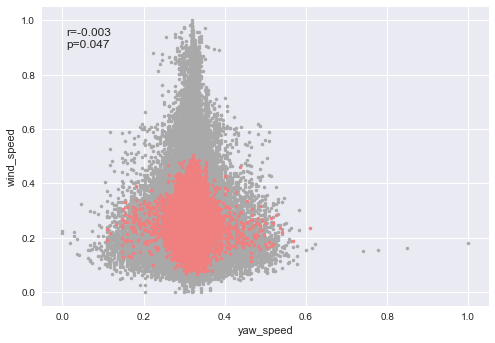

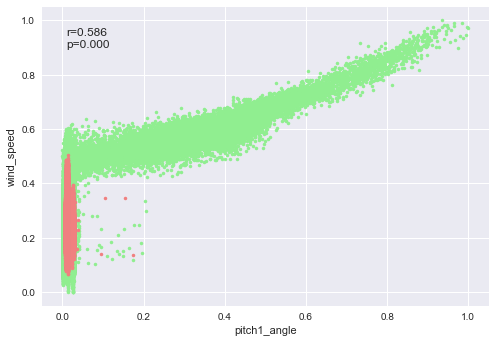

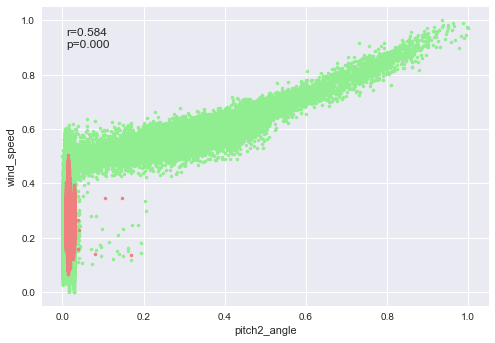

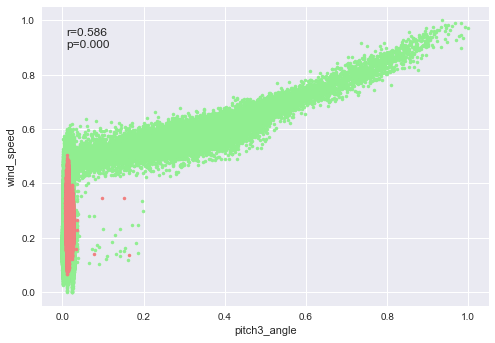

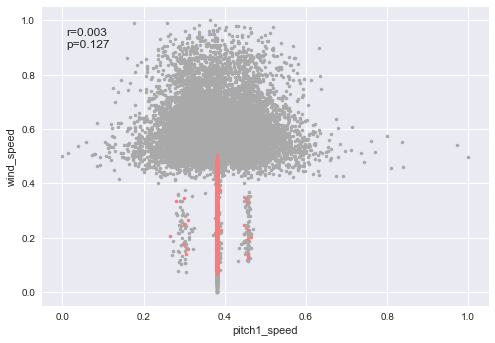

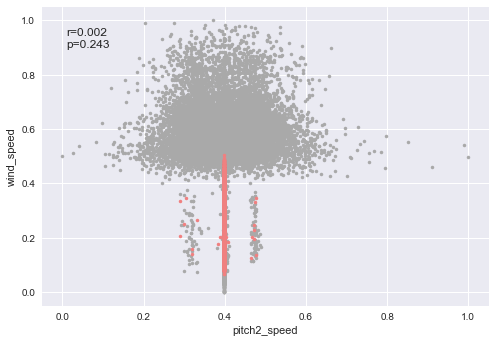

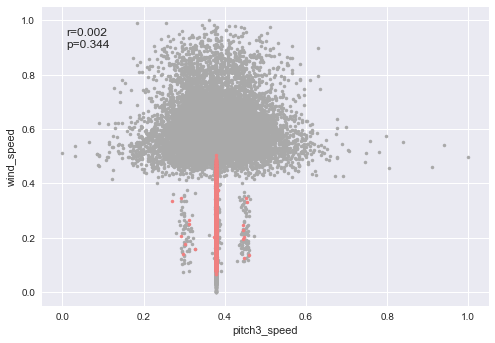

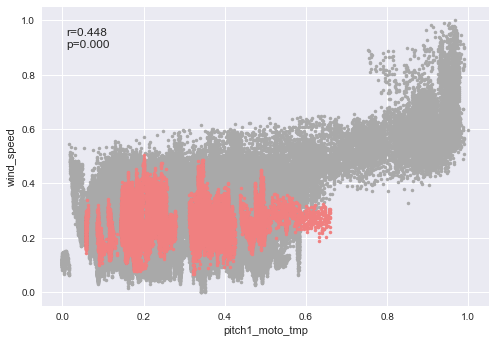

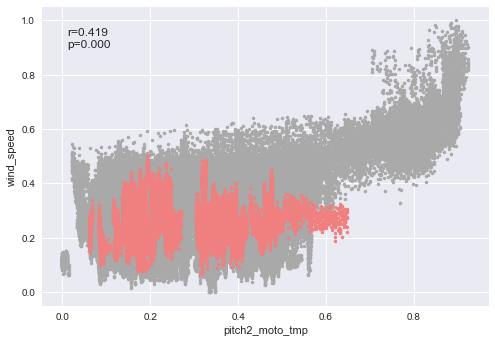

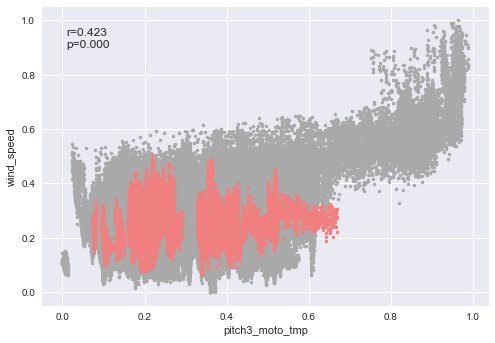

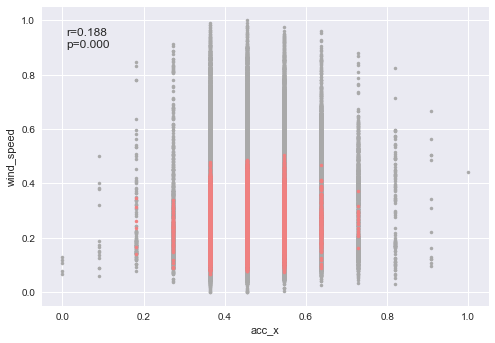

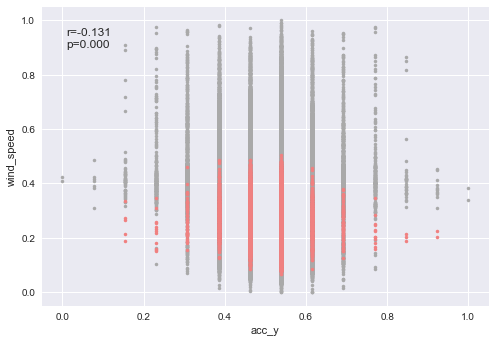

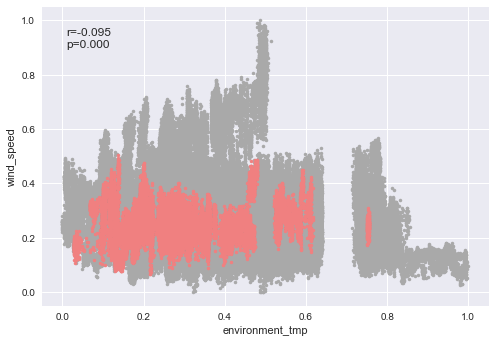

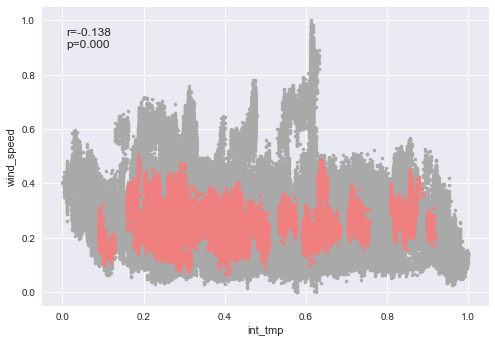

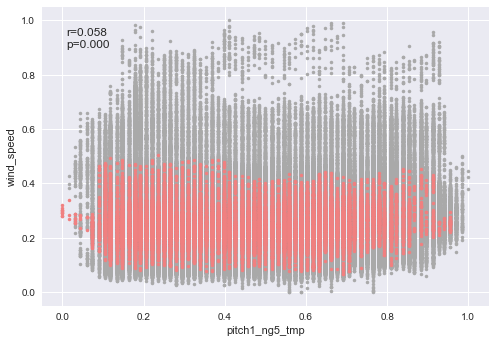

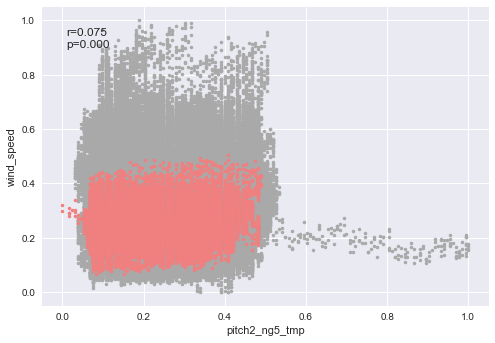

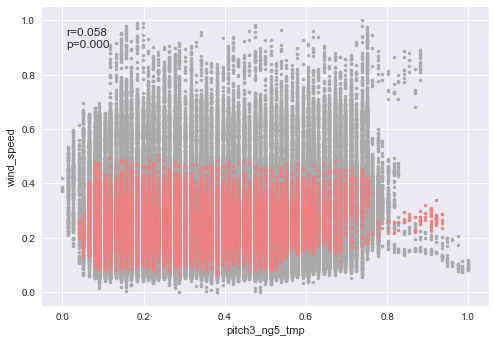

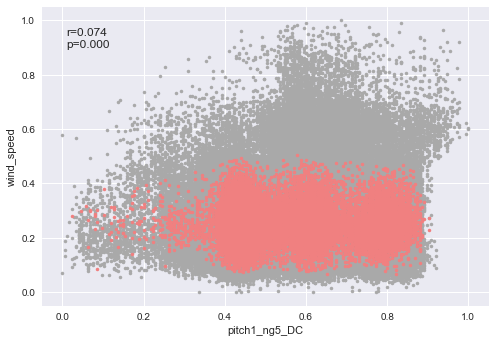

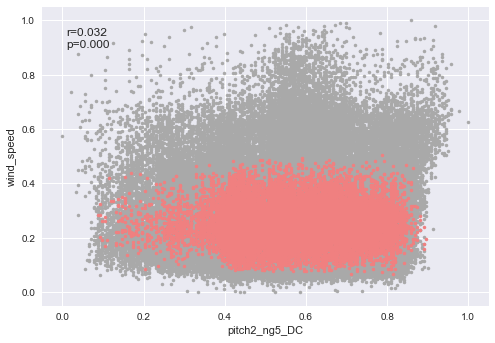

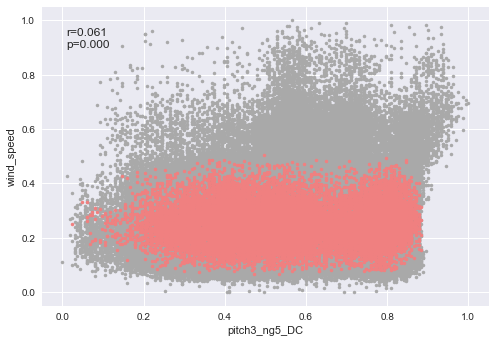

/Users/jayhsu/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


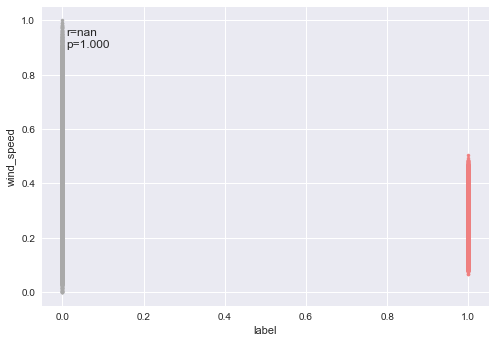

In [17]:
path='case_management/img/feature_importance/scatter_wind_speed/'
checkPath(path)
y='wind_speed'
for x in cols:
    #dummy = plt.figure(figsize=[8,8])
    r, p = pearsonr(data_pass[x],data_pass[y])
    raw_clr = 'lightgreen' if r>0.5 else 'darkgray'
    plt.plot(data_pass[x],data_pass[y],'.', color=raw_clr)
    plt.plot(data_fail[x],data_fail[y],'.', color='lightcoral')
    msg = 'r={corr:.3f}\np={pval:.3f}'.format(corr=r, pval=p)
    plt.text(0.01,0.9,msg)
    plt.xlabel(x)
    plt.ylabel(y)
    imagename='{p}{n}.jpg'.format(p=path, n=x)
    plt.savefig(imagename,bbox_inches='tight', dpi=200)
    plt.show()
    #plt.plot(data_pass[x],data_pass[y],'.', color=raw_clr)



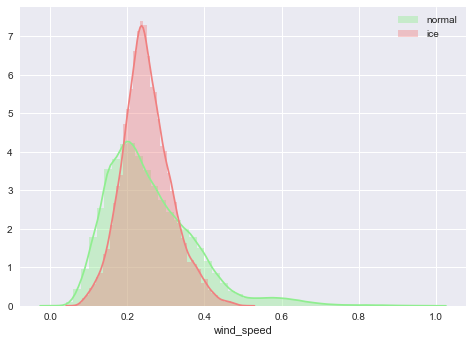

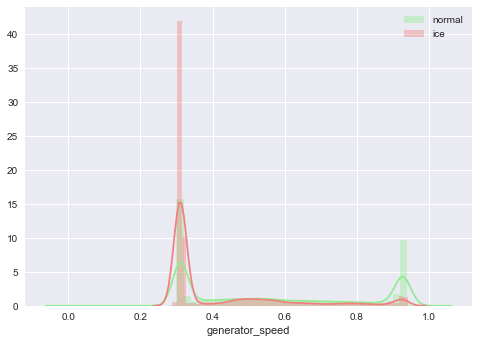

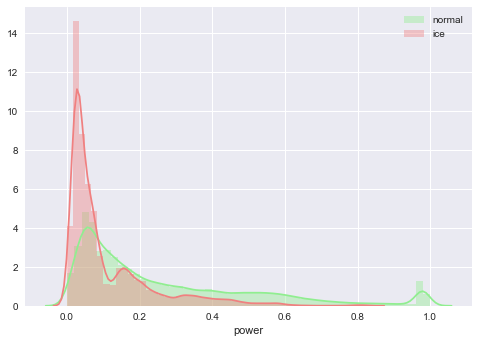

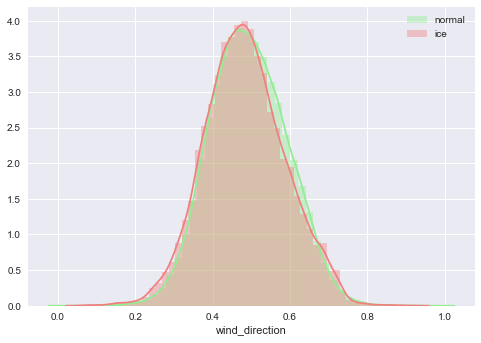

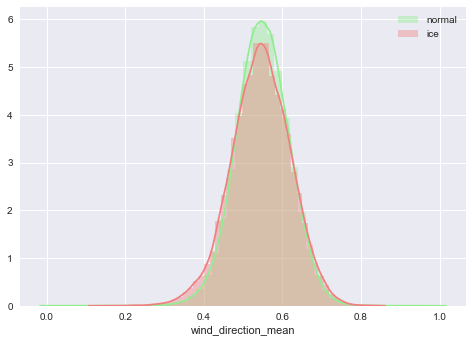

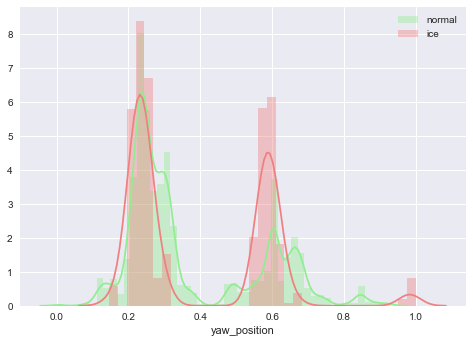

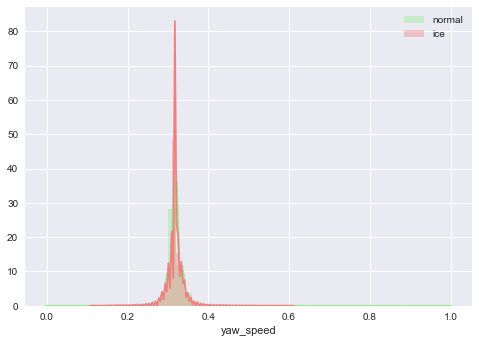

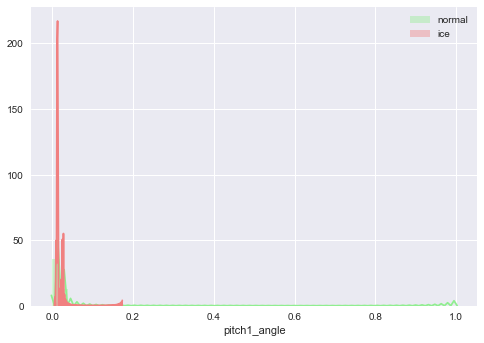

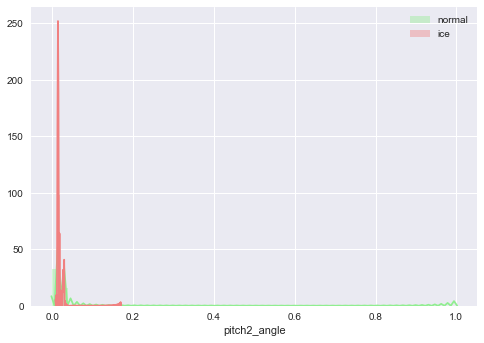

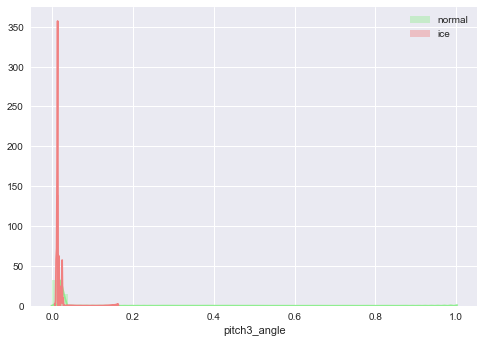

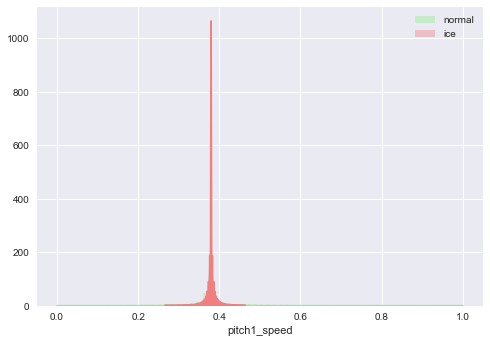

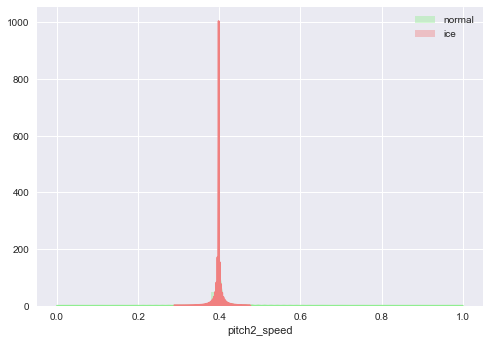

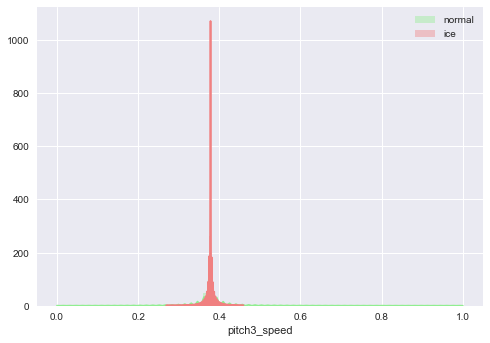

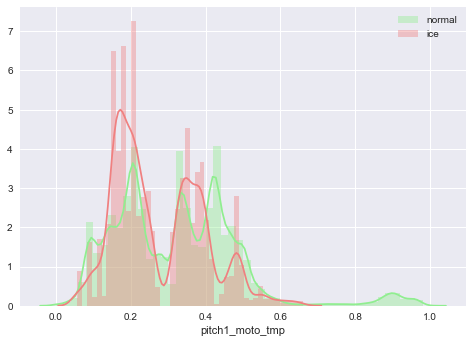

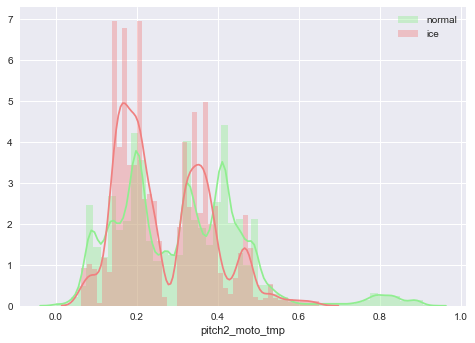

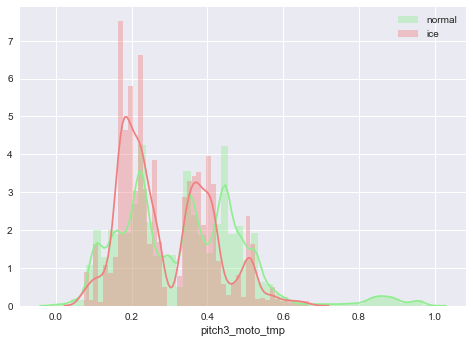

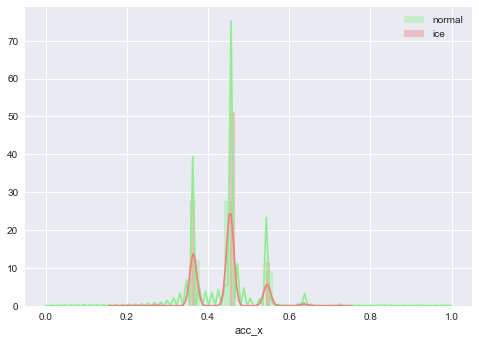

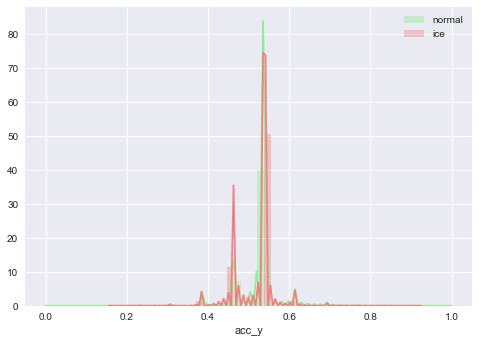

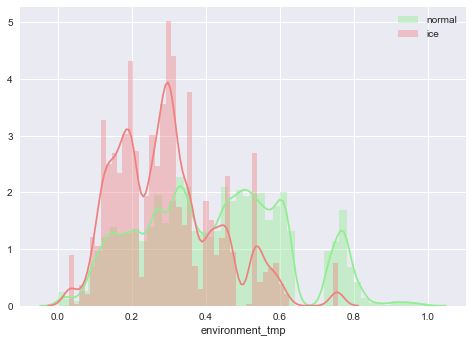

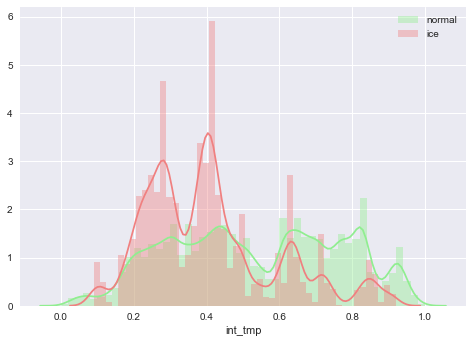

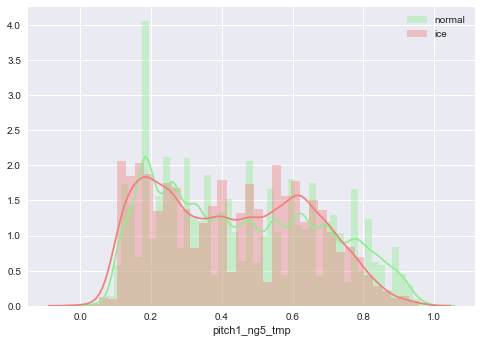

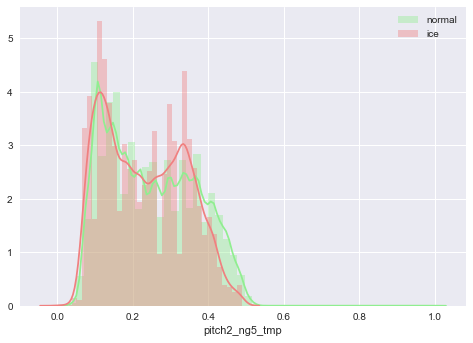

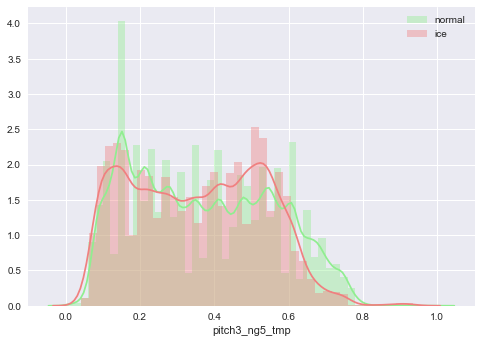

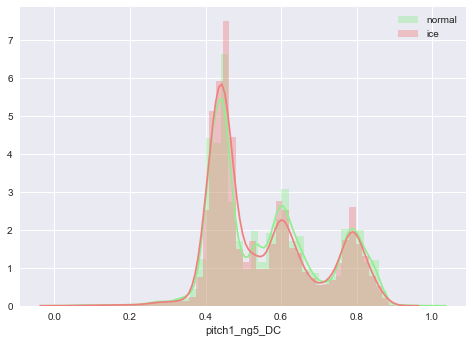

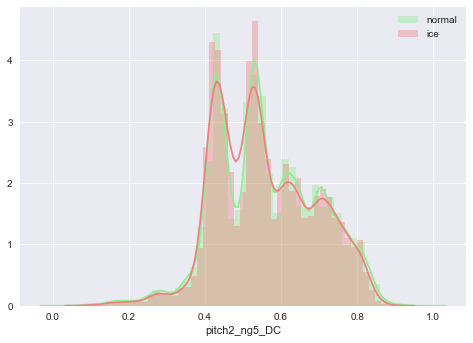

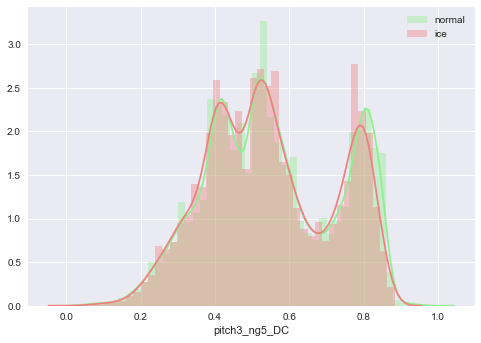

/Users/jayhsu/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/jayhsu/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


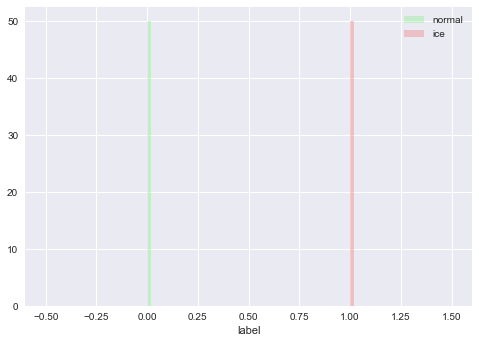

In [24]:
path='case_management/img/feature_importance/distribution/'
checkPath(path)
for x in cols:
    sns.distplot(data_pass[x], label='normal', color='lightgreen') 
    sns.distplot(data_fail[x], label='ice', color='lightcoral') 
    plt.xlabel(x)
    imagename='{p}{n}.jpg'.format(p=path, n=x)
    plt.savefig(imagename,bbox_inches='tight', dpi=200)
    plt.legend()
    plt.show()